In [1]:
import keras as ks
import numpy as np
import matplotlib.pyplot as plt
import cv2
import pickle as pkl

Using TensorFlow backend.


In [2]:
from model import create_model
from preprocessing import preprocess

In [4]:
orig_labels=[]
with open("./labels.pickle","rb") as file:
    orig_labels=pkl.load(file)
    
aug_labels=[]
with open("./augments_label.pickle","rb") as file:
    aug_labels=pkl.load(file)
    
labels=orig_labels+aug_labels
np.random.shuffle(labels)
len(labels)

1065

In [28]:
total_data=0
ones=[]
for image in labels:
    total_data+=image[1][0]
    ones+=image[1][-1]
total_data,(np.array(ones)=='1').sum()

(320, 131)

In [6]:
batch_size=256
epochs=2
steps_per_epoch=total_data/batch_size

In [7]:
model=create_model((224,224,3))
gen=preprocess(labels,"./Data/images/",batch_size=2)

In [12]:
model.fit_generator(gen,steps_per_epoch=steps_per_epoch,epochs=2)

In [14]:
gen

<generator object preprocess at 0x000001DFABD8FE60>

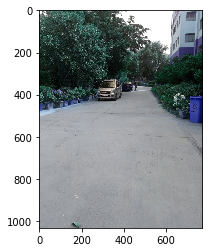

In [11]:
img=cv2.imread("./Data/images/IMG-20190708-WA0000.jpg")
plt.imshow(img)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


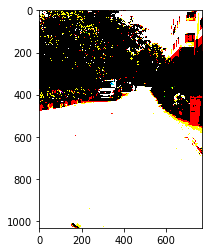

In [12]:
img=preprocess_input(img)
plt.imshow(img)